Let's generate 200 uniformly random datapoints in a rectangle. 

In [1]:
n <- 200 
# number of points

In [3]:
# let's set the range
xmin <- 0
xmax <- 1

ymin <- 0
ymax <- 2

In [4]:
# create a uniform sample distribution
x <- runif(n, 0, 1)
y <- runif(n, 0, 2)

In [9]:
head(x)

[1] 0.9711304 0.8956338 0.9609014 0.8690984 0.5899851 0.1505983

In [10]:
head(y)

[1] 1.21268616 1.68308530 0.17239578 0.06931592 0.11431501 0.93081403

When plotting spatial data, make sure the one X unit is the same size as one Y unit. We don't want any misrepresentation. The Y axis scale to X axis scale is called the aspect ratio. Spatial data should be represented with an aspect ratio of 1:1. 

In [12]:
ls.str() # show me previously assigned variables. 

n :  num 200
x :  num [1:200] 0.971 0.896 0.961 0.869 0.59 ...
xmax :  num 1
xmin :  num 0
y :  num [1:200] 1.2127 1.6831 0.1724 0.0693 0.1143 ...
ymax :  num 2
ymin :  num 0

In [13]:
mapxy <- function(a = NA){
    plot(x, y, asp = a)
    rect(xmin, ymin, xmax, ymax)
}

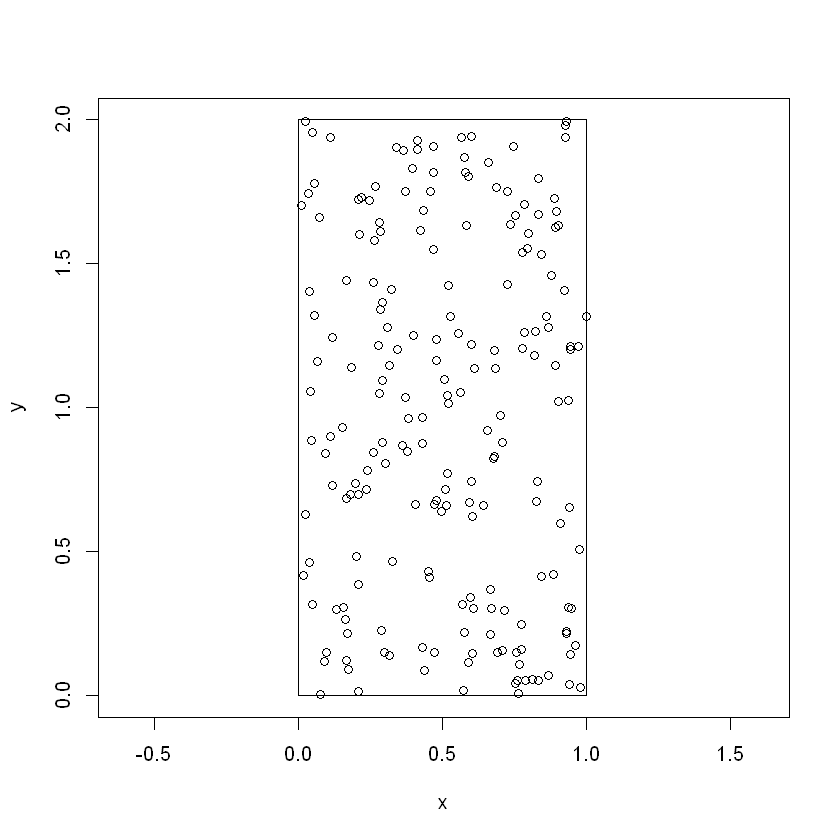

In [14]:
mapxy(1) # aspect ratio = 1